#### Summary: 
In this PYTHON notebook I will pilot Scrublet on different RDS files of clustering intermediates. This is based on the example notebook Mei shared with me: `/nfs/lab/mokino/FA21/scRNA/22nov21_scrublet_control_rep3.ipynb`. To note: this requires .mtx input files so I will be making those in the previous R notebooks from the RDS files (made in the 8/22 notebook).

Installed scrublet by running `pip install scrublet` in the terminal (not sudo).

In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
import time
from datetime import datetime

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

# Test 1: run Scrublet on the most recent filtered object (195k cells)

In [4]:
object_prefix = 'noAMULET.noMTper_REAL.noTSSe2.upper_ATAC+RNA_bounds'

In [7]:
input_dir = '/nfs/lab/hmummey/multiomic_islet/intermediates/220823_scrublet_pilot/'
start = time.time()
counts_matrix = scipy.io.mmread(input_dir + object_prefix + '/matrix.mtx').T.tocsc()
end = time.time()
print(end - start)

624.598751783371


IndexError: list index out of range

In [10]:
start = time.time()
genes = np.array(scrub.load_genes(input_dir + object_prefix + '/genes.tsv', delimiter='\t', column=0))
end = time.time()
print(end - start)

0.03935503959655762


In [11]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 195531 rows, 36601 columns
Number of genes in gene list: 36601


In [12]:
#run the default pipeline
scrub = scrub.Scrublet(counts_matrix, expected_doublet_rate=0.06)

start = time.time()
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
end = time.time()
print(end - start)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 43.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.7%
Elapsed time: 718.8 seconds
718.8219995498657


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


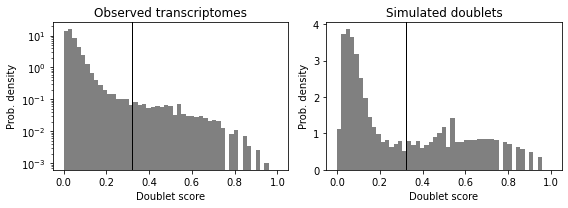

In [13]:
#estimate the doublet score threshold - plot doublet score histograms
scrub.plot_histogram()
plt.show()

In [14]:
#visualize in 2D

print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Done.


In [16]:
doublet_threshold = 0.3 ####### adjust threshold based on histogram

predicted_doublets = scrub.call_doublets(threshold=doublet_threshold) 
len(predicted_doublets)

Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 44.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.9%


195531

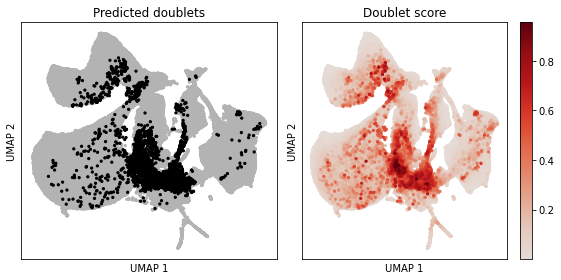

In [17]:
scrub.plot_embedding('UMAP', order_points=True)
# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);
plt.show()

In [21]:
barcodes_fp = input_dir + object_prefix + '/barcodes.tsv'
print(barcodes_fp)
print(predicted_doublets[0:5])

with open(barcodes_fp, 'r') as f:
    with open(input_dir + object_prefix + '.scrublet_predicted_doublets_cutoff{}.txt'.format(doublet_threshold), 'w') as o:
        counter=0
        for line in f:
            o.write('\t'.join((line.strip(), str(predicted_doublets[counter]), str(doublet_scores[counter]), '\n')))
            counter+=1

/nfs/lab/hmummey/multiomic_islet/intermediates/220823_scrublet_pilot/noAMULET.noMTper_REAL.noTSSe2.upper_ATAC+RNA_bounds/barcodes.tsv
[False False False False False]


# Test 2: run Scrublet on the raw filtered object (250k cells)

In [4]:
object_prefix = 'raw_combined'

In [5]:
input_dir = '/nfs/lab/hmummey/multiomic_islet/intermediates/220823_scrublet_pilot/'
start = time.time()
counts_matrix = scipy.io.mmread(input_dir + object_prefix + '/matrix.mtx').T.tocsc()
end = time.time()
print(end - start)

753.323150396347


In [8]:
start = time.time()
genes = np.array(scr.load_genes(input_dir + object_prefix + '/genes.tsv', delimiter='\t', column=0))
end = time.time()
print(end - start)

0.039460182189941406


In [9]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 251605 rows, 36601 columns
Number of genes in gene list: 36601


In [10]:
#run the default pipeline
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

start = time.time()
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
end = time.time()
print(end - start)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.6%
Estimated detectable doublet fraction = 48.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.6%
Elapsed time: 1168.8 seconds
1168.8408033847809


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


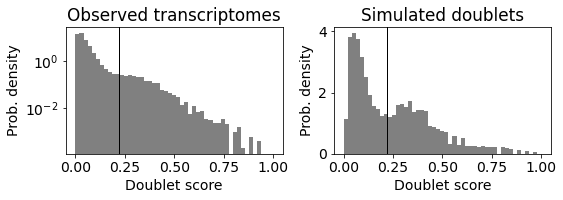

In [11]:
#estimate the doublet score threshold - plot doublet score histograms
scrub.plot_histogram()
plt.show()

In [12]:
#visualize in 2D

print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Done.


In [13]:
doublet_threshold = 0.2 ####### adjust threshold based on histogram

predicted_doublets = scrub.call_doublets(threshold=doublet_threshold) 
len(predicted_doublets)

Detected doublet rate = 5.1%
Estimated detectable doublet fraction = 50.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.1%


251605

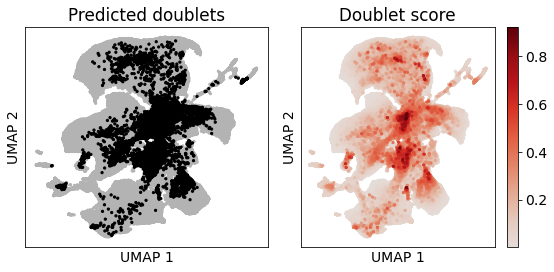

In [14]:
scrub.plot_embedding('UMAP', order_points=True)
# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);
plt.show()

In [15]:
barcodes_fp = input_dir + object_prefix + '/barcodes.tsv'
print(barcodes_fp)
print(predicted_doublets[0:5])

with open(barcodes_fp, 'r') as f:
    with open(input_dir + object_prefix + '.scrublet_predicted_doublets_cutoff{}.txt'.format(doublet_threshold), 'w') as o:
        counter=0
        for line in f:
            o.write('\t'.join((line.strip(), str(predicted_doublets[counter]), str(doublet_scores[counter]), '\n')))
            counter+=1

/nfs/lab/hmummey/multiomic_islet/intermediates/220823_scrublet_pilot/raw_combined/barcodes.tsv
[False False False False False]


"When working with data from multiple samples, run Scrublet on each sample separately. Because Scrublet is designed to detect technical doublets formed by the random co-encapsulation of two cells, it may perform poorly on merged datasets where the cell type proportions are not representative of any single sample."

# Test 3: run Scrublet on one (slightly filtered) sample object

In [4]:
object_prefix = 'sample_R207'

In [5]:
input_dir = '/nfs/lab/hmummey/multiomic_islet/intermediates/220823_scrublet_pilot/'
start = time.time()
counts_matrix = scipy.io.mmread(input_dir + object_prefix + '/matrix.mtx').T.tocsc()
end = time.time()
print(end - start)

83.52450728416443


In [6]:
start = time.time()
genes = np.array(scr.load_genes(input_dir + object_prefix + '/genes.tsv', delimiter='\t', column=0))
end = time.time()
print(end - start)

0.032143354415893555


In [7]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 9678 rows, 36601 columns
Number of genes in gene list: 36601


In [8]:
#run the default pipeline
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

start = time.time()
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
end = time.time()
print(end - start)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 44.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.1%
Elapsed time: 14.8 seconds
14.763598442077637


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


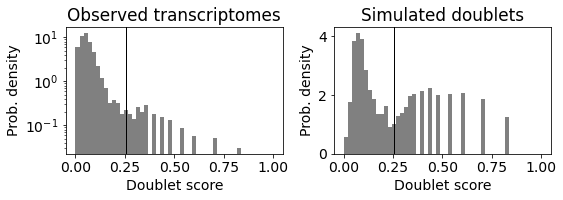

In [9]:
#estimate the doublet score threshold - plot doublet score histograms
scrub.plot_histogram()
plt.show()

In [10]:
#visualize in 2D

print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Done.


In [11]:
doublet_threshold = 0.25 ####### adjust threshold based on histogram

predicted_doublets = scrub.call_doublets(threshold=doublet_threshold) 
len(predicted_doublets)

Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 46.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.7%


9678

In [19]:
scrub.overall_doublet_rate_
scrub.threshold_

0.25

In [14]:
sum(predicted_doublets)

392

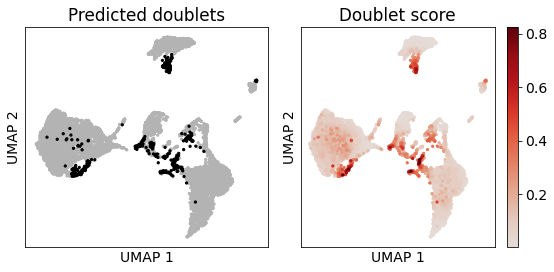

In [12]:
scrub.plot_embedding('UMAP', order_points=True)
# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);
plt.show()

In [13]:
barcodes_fp = input_dir + object_prefix + '/barcodes.tsv'
print(barcodes_fp)
print(predicted_doublets[0:5])

with open(barcodes_fp, 'r') as f:
    with open(input_dir + object_prefix + '.scrublet_predicted_doublets_cutoff{}.txt'.format(doublet_threshold), 'w') as o:
        counter=0
        for line in f:
            o.write('\t'.join((line.strip(), str(predicted_doublets[counter]), str(doublet_scores[counter]), '\n')))
            counter+=1

/nfs/lab/hmummey/multiomic_islet/intermediates/220823_scrublet_pilot/sample_R207/barcodes.tsv
[False False False False False]


# Run Scrublet on all samples individually? 
Make sure we can loop through these successfully (previously had to restart the kernel between sessions)... But maybe I can just trash the scrub object? Also I have been manually setting the doublet filter cutoff... Not sure how to automate that either...
**8/25/22**: looking at Scrublet outputs more and it automatically sets a doublet score, that seems good to me. So that will be fine in a loop, the main issue is just wiping the scrub object. 

In [14]:
samples  =  ['R207','R217','R218','R221','R223',
             'R226','R228','R234','R237','R238',
             'R246', 'R247', 'R275', 'R277', 'R284', 
             'R290', 'R292', 'R316', 'R317', 'R319',
             'R325','R326','R327','R332','R343',
             'R349','R353','R354','R362','R363','R364']

R207 2022-09-01 13:07:21.809558
Counts matrix shape: 9678 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 44.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.1%
Elapsed time: 13.0 seconds
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 44.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.1%
347/9678 of BCs called as doublets


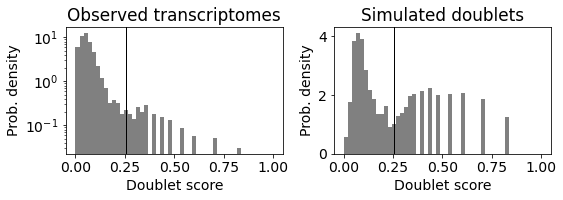

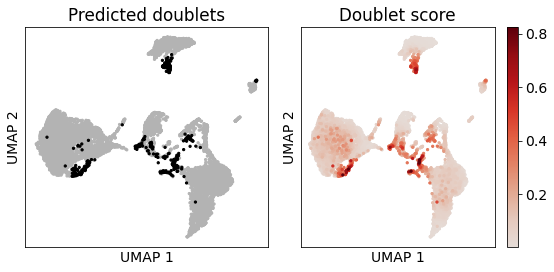


R217 2022-09-01 13:08:19.881026
Counts matrix shape: 10672 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.2%
Estimated detectable doublet fraction = 55.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.3%
Elapsed time: 14.3 seconds
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.2%
Estimated detectable doublet fraction = 55.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.3%
667/10672 of BCs called as doublets


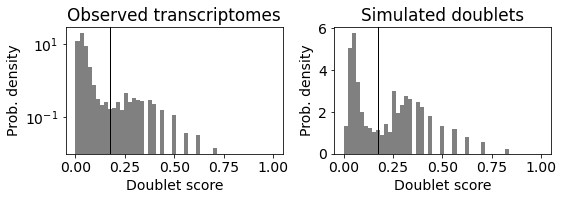

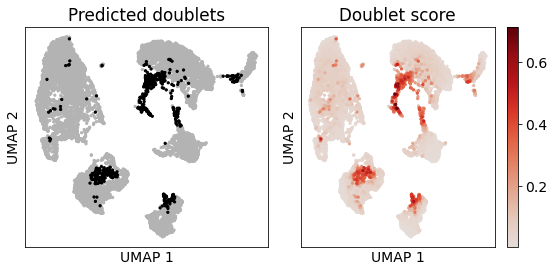


R218 2022-09-01 13:09:18.606936
Counts matrix shape: 5649 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
Elapsed time: 5.6 seconds
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
3/5649 of BCs called as doublets


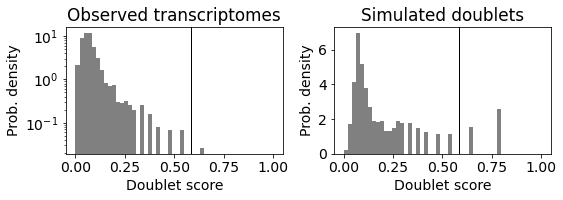

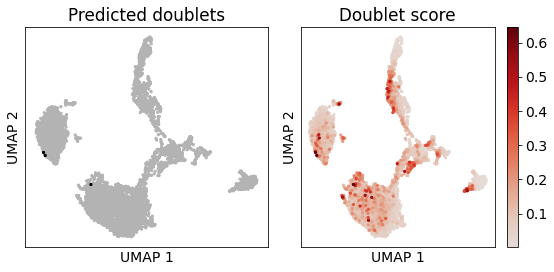


R221 2022-09-01 13:09:50.034400
Counts matrix shape: 7127 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.1%
Elapsed time: 7.0 seconds
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.1%
10/7127 of BCs called as doublets


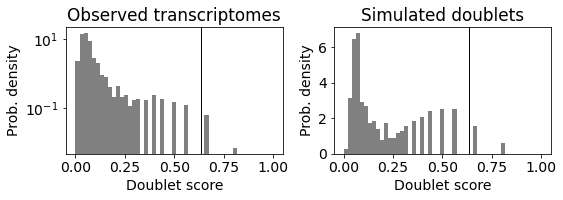

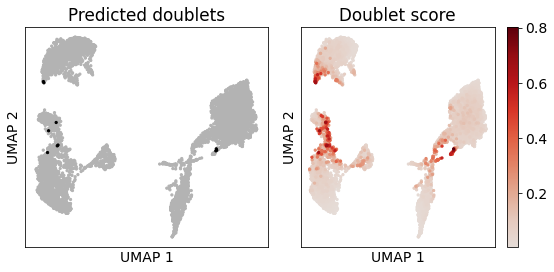


R223 2022-09-01 13:10:24.062701
Counts matrix shape: 9469 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 53.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.3%
Elapsed time: 18.3 seconds
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 53.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.3%
572/9469 of BCs called as doublets


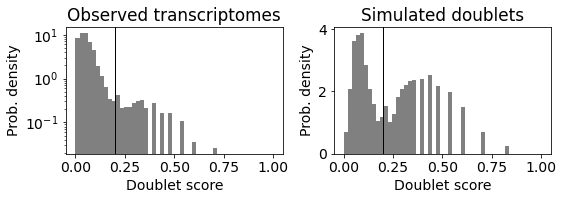

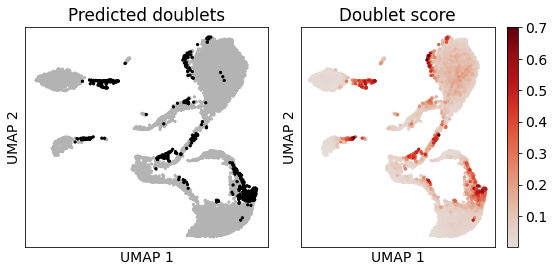


R226 2022-09-01 13:11:28.483669
Counts matrix shape: 7842 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.7%
Estimated detectable doublet fraction = 49.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.6%
Elapsed time: 9.4 seconds
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.7%
Estimated detectable doublet fraction = 49.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.6%
371/7842 of BCs called as doublets


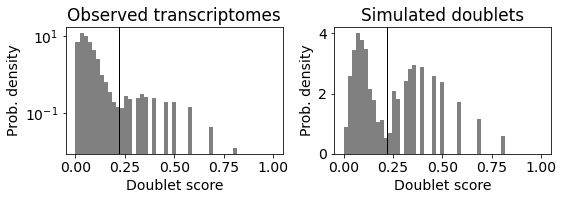

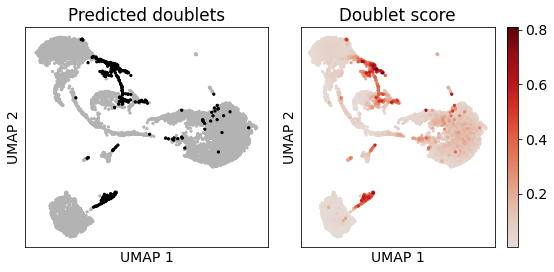


R228 2022-09-01 13:12:23.955148
Counts matrix shape: 7475 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 5.2%
Estimated detectable doublet fraction = 57.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.0%
Elapsed time: 9.6 seconds
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 5.2%
Estimated detectable doublet fraction = 57.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.0%
385/7475 of BCs called as doublets


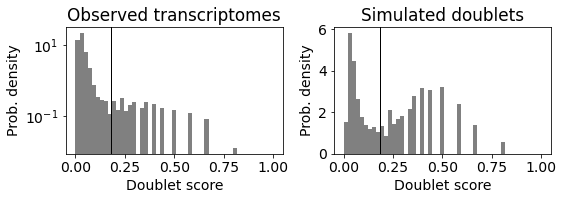

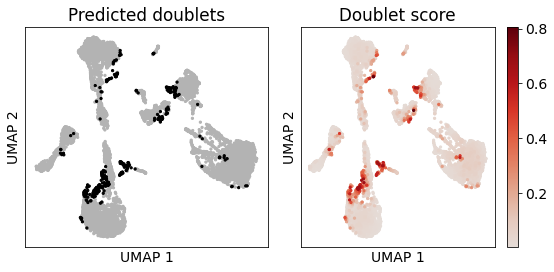


R234 2022-09-01 13:13:13.127821
Counts matrix shape: 8505 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 56.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.5%
Elapsed time: 10.4 seconds
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 56.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.5%
509/8505 of BCs called as doublets


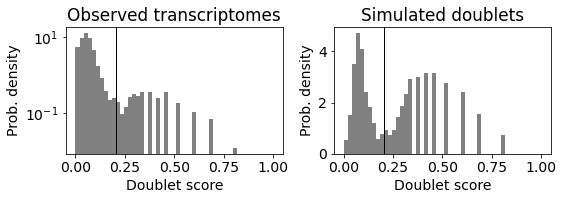

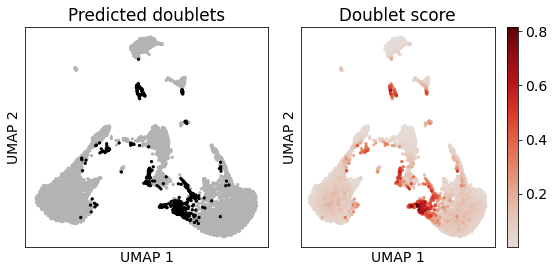


R237 2022-09-01 13:14:11.649109
Counts matrix shape: 7857 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.4%
Estimated detectable doublet fraction = 54.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.1%
Elapsed time: 9.5 seconds
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.4%
Estimated detectable doublet fraction = 54.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.1%
343/7857 of BCs called as doublets


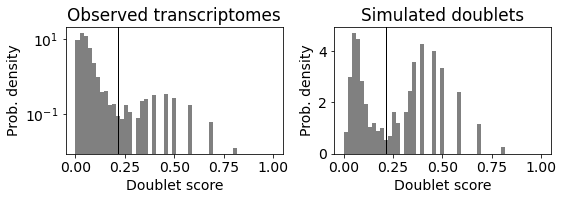

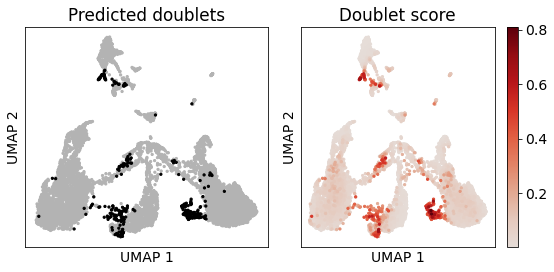


R238 2022-09-01 13:15:02.885232
Counts matrix shape: 7817 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
Elapsed time: 9.3 seconds
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
5/7817 of BCs called as doublets


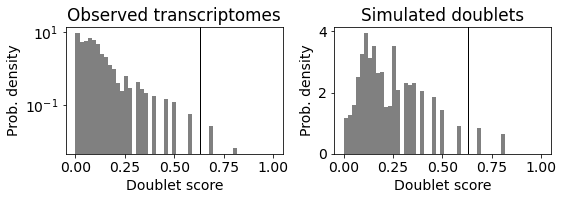

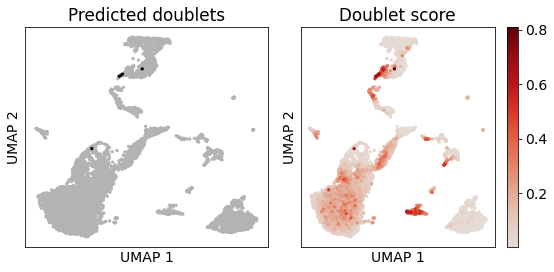


R246 2022-09-01 13:15:52.973088
Counts matrix shape: 2221 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 4.4%
Estimated detectable doublet fraction = 47.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.2%
Elapsed time: 2.1 seconds
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 4.4%
Estimated detectable doublet fraction = 47.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.2%
97/2221 of BCs called as doublets


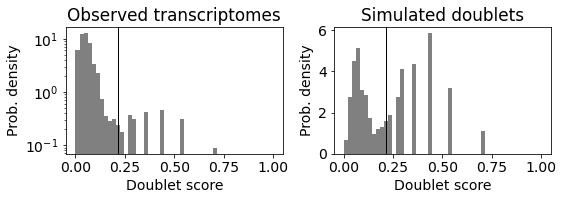

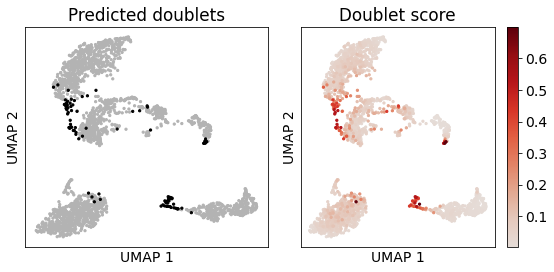


R247 2022-09-01 13:16:11.920823
Counts matrix shape: 7293 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 4.6%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%
Elapsed time: 10.4 seconds
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 4.6%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%
336/7293 of BCs called as doublets


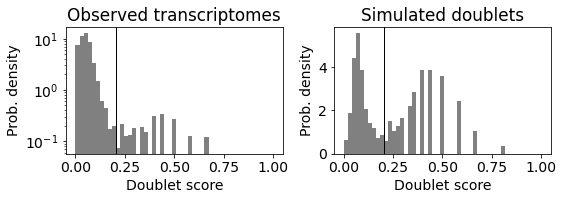

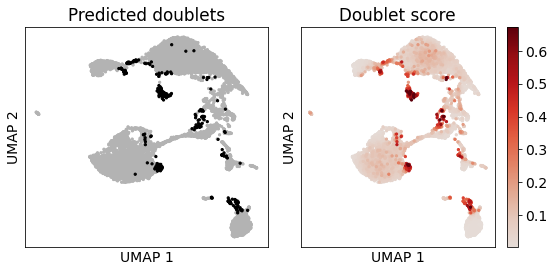


R275 2022-09-01 13:16:58.826476
Counts matrix shape: 6166 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.7%
Elapsed time: 5.9 seconds
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.7%
3/6166 of BCs called as doublets


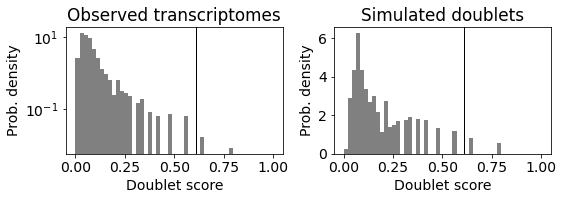

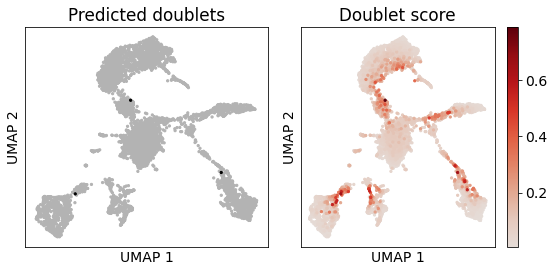


R277 2022-09-01 13:17:29.611996
Counts matrix shape: 8029 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.0%
Elapsed time: 13.1 seconds
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.0%
2/8029 of BCs called as doublets


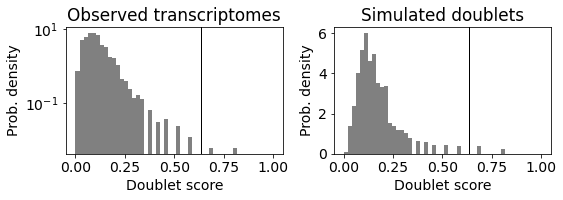

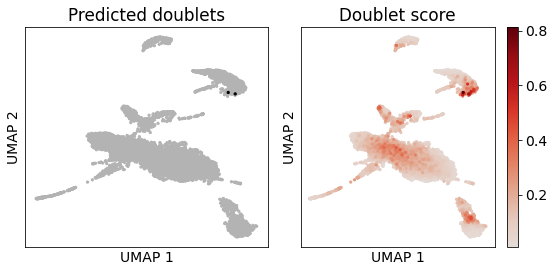


R284 2022-09-01 13:18:22.418125
Counts matrix shape: 7417 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.6%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.8%
Elapsed time: 11.9 seconds
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.6%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.8%
486/7417 of BCs called as doublets


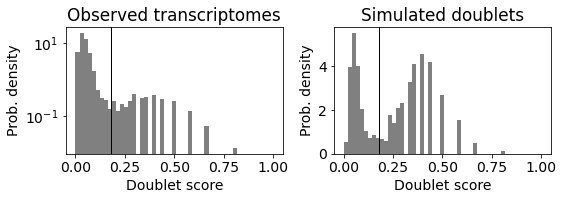

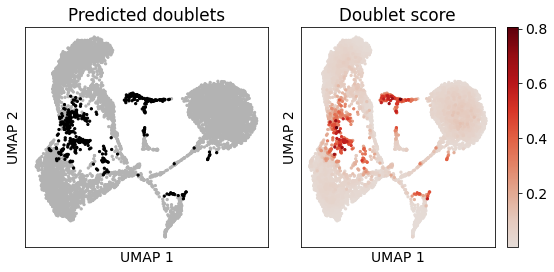


R290 2022-09-01 13:19:08.845989
Counts matrix shape: 9380 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.8%
Estimated detectable doublet fraction = 56.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.0%
Elapsed time: 17.7 seconds
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.8%
Estimated detectable doublet fraction = 56.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.0%
636/9380 of BCs called as doublets


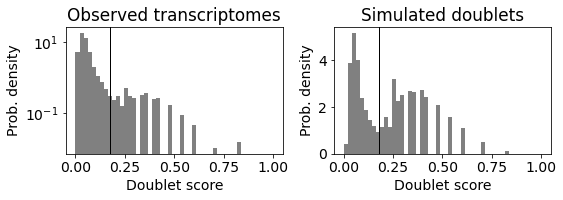

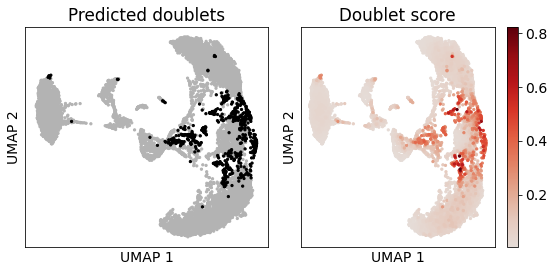


R292 2022-09-01 13:20:13.142961
Counts matrix shape: 8103 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 46.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.2%
Elapsed time: 11.7 seconds
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 46.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.2%
343/8103 of BCs called as doublets


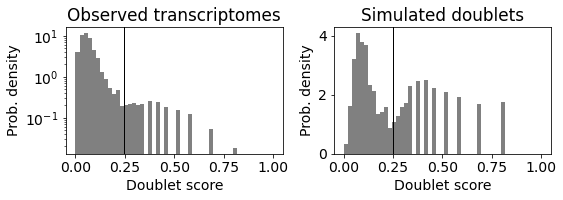

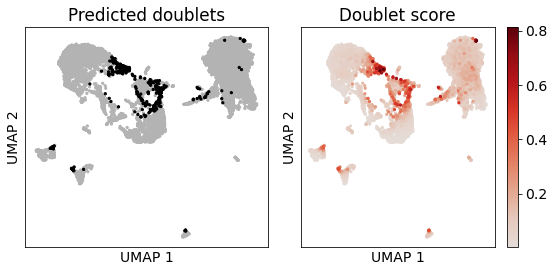


R316 2022-09-01 13:21:07.094931
Counts matrix shape: 13171 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 7.0%
Estimated detectable doublet fraction = 55.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.6%
Elapsed time: 22.3 seconds
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 7.0%
Estimated detectable doublet fraction = 55.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.6%
928/13171 of BCs called as doublets


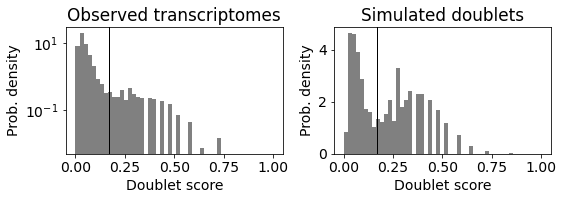

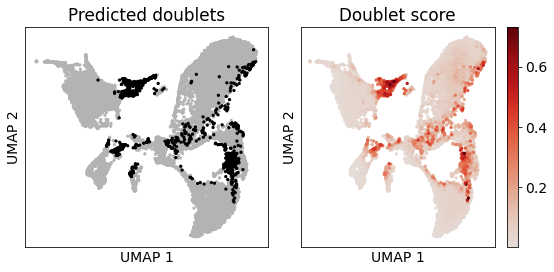


R317 2022-09-01 13:22:19.869509
Counts matrix shape: 12520 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.0%
Elapsed time: 36.8 seconds
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.0%
4/12520 of BCs called as doublets


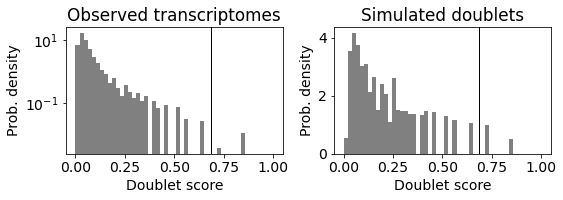

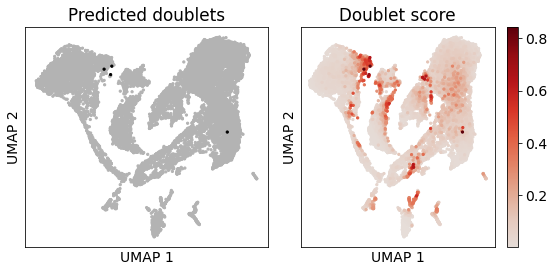


R319 2022-09-01 13:24:04.942310
Counts matrix shape: 11438 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.5%
Elapsed time: 24.3 seconds
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.5%
2/11438 of BCs called as doublets


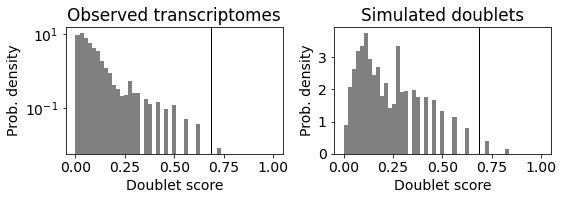

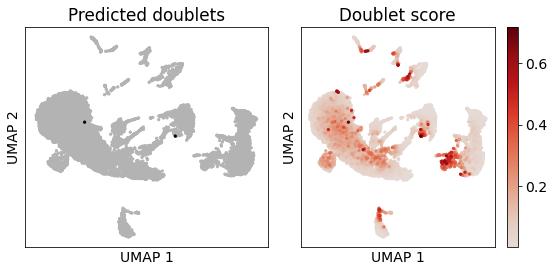


R325 2022-09-01 13:25:26.951030
Counts matrix shape: 2164 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 4.9%
Estimated detectable doublet fraction = 48.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.2%
Elapsed time: 1.8 seconds
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 4.9%
Estimated detectable doublet fraction = 48.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.2%
107/2164 of BCs called as doublets


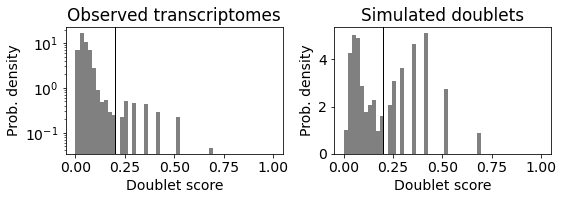

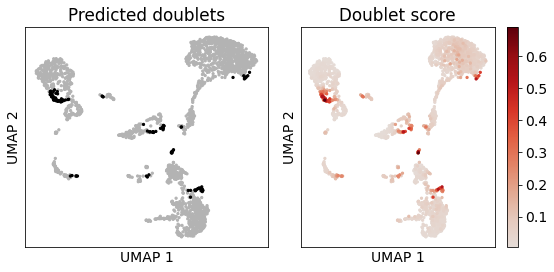


R326 2022-09-01 13:25:41.962041
Counts matrix shape: 12198 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 7.1%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.7%
Elapsed time: 43.5 seconds
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 7.1%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.7%
869/12198 of BCs called as doublets


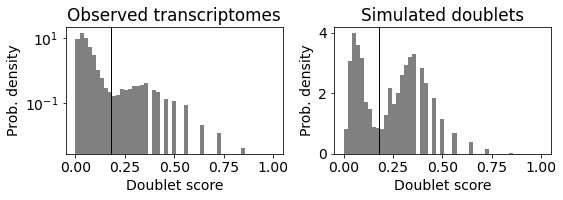

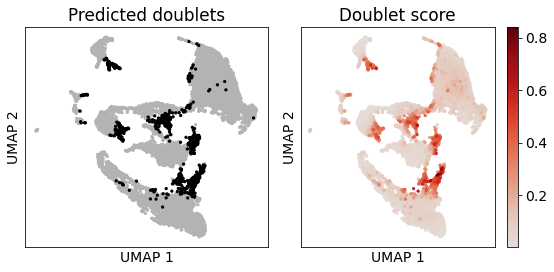


R327 2022-09-01 13:27:20.941339
Counts matrix shape: 7811 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 35.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.5%
Elapsed time: 12.0 seconds
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 35.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.5%
321/7811 of BCs called as doublets


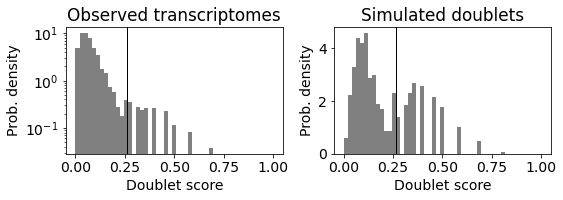

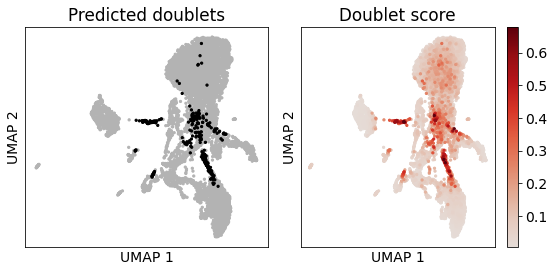


R332 2022-09-01 13:28:09.246572
Counts matrix shape: 10156 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.1%
Estimated detectable doublet fraction = 53.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.2%
Elapsed time: 13.6 seconds
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 6.1%
Estimated detectable doublet fraction = 53.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.2%
615/10156 of BCs called as doublets


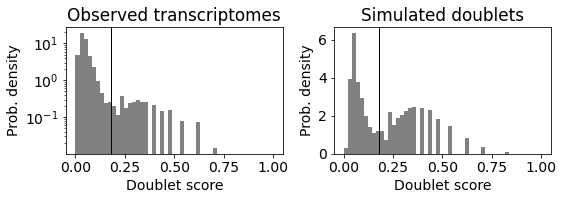

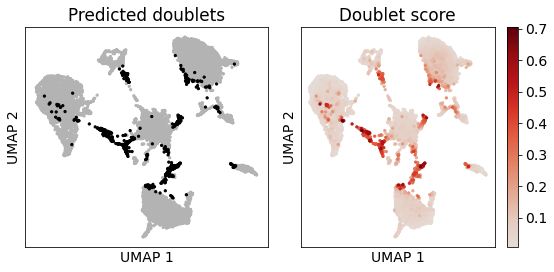


R343 2022-09-01 13:28:59.931357
Counts matrix shape: 5808 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 6.1 seconds
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
0/5808 of BCs called as doublets


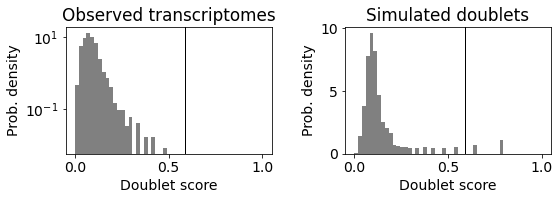

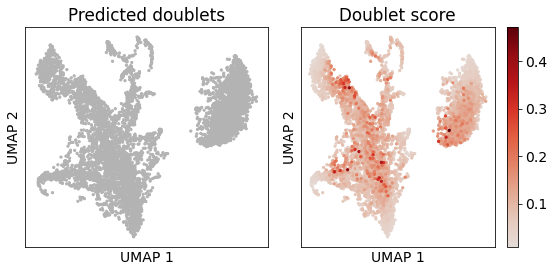


R349 2022-09-01 13:29:29.391990
Counts matrix shape: 6113 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.0%
Elapsed time: 5.5 seconds
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.0%
1/6113 of BCs called as doublets


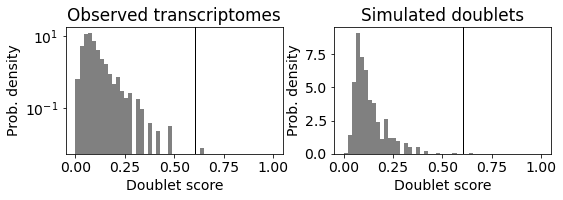

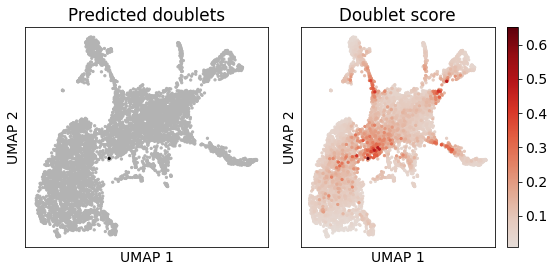


R353 2022-09-01 13:29:56.330121
Counts matrix shape: 7850 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 59.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.0%
Elapsed time: 18.8 seconds
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 59.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.0%
470/7850 of BCs called as doublets


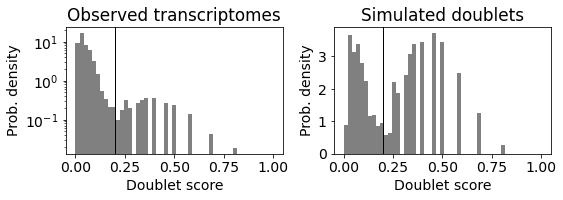

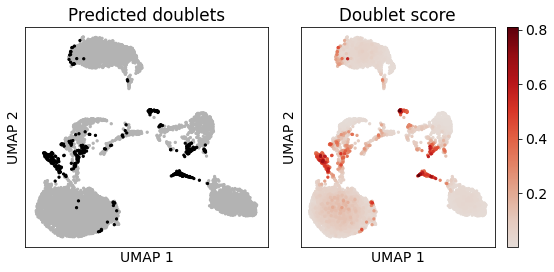


R354 2022-09-01 13:30:50.044860
Counts matrix shape: 6957 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 54.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.0%
Elapsed time: 11.4 seconds
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 54.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.0%
337/6957 of BCs called as doublets


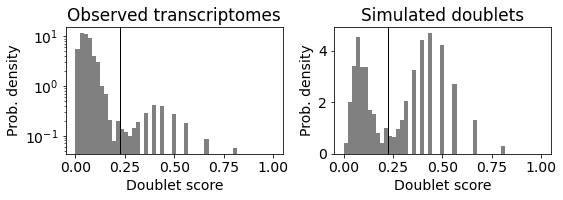

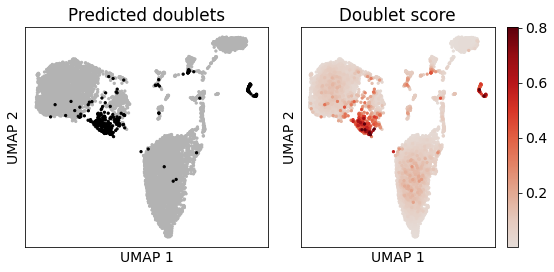


R362 2022-09-01 13:31:35.046377
Counts matrix shape: 8720 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 39.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.0%
Elapsed time: 21.1 seconds
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 39.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.0%
311/8720 of BCs called as doublets


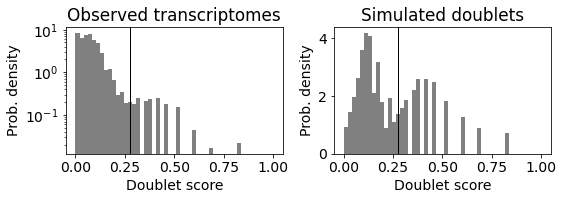

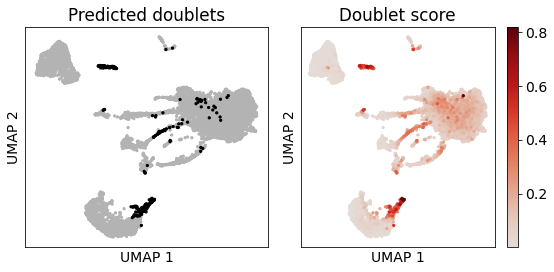


R363 2022-09-01 13:32:43.060825
Counts matrix shape: 10646 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 7.1%
Estimated detectable doublet fraction = 65.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.8%
Elapsed time: 18.9 seconds
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 7.1%
Estimated detectable doublet fraction = 65.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.8%
751/10646 of BCs called as doublets


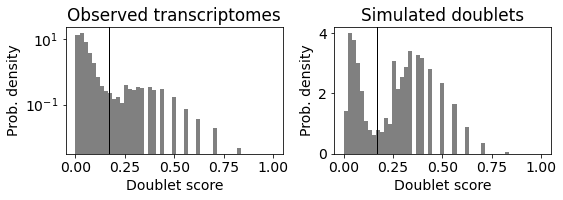

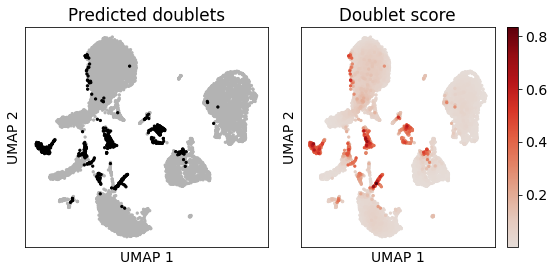


R364 2022-09-01 13:33:45.638494
Counts matrix shape: 5353 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.9%
Elapsed time: 4.9 seconds
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.9%
7/5353 of BCs called as doublets


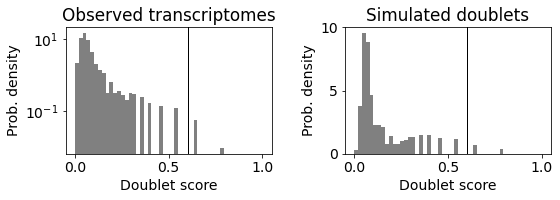

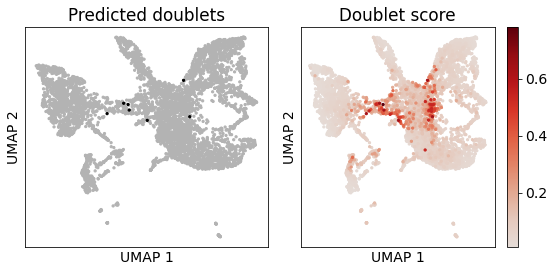

In [15]:
for sample in samples:
    print(sample, datetime.now())
    
    #read in inputs
    input_dir = '/nfs/lab/projects/multiomic_islet/outputs/multiome/indv_sample_processing/' + sample + '/matrix_market'
    counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
    genes = np.array(scr.load_genes(input_dir + '/genes.tsv', delimiter='\t', column=0))
    
    print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
    print('Number of genes in gene list: {}'.format(len(genes)))
    
    #run the default pipeline
    scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                              min_cells=3, 
                                                              min_gene_variability_pctl=85, 
                                                              n_prin_comps=30)
    
    #call doublets based on default threshold
    predicted_doublets = scrub.call_doublets() 
    print(str(sum(predicted_doublets)) + '/' + str(len(predicted_doublets)) + ' of BCs called as doublets')
    
    #estimate the doublet score threshold - plot doublet score histograms
    scrub.plot_histogram()
    plt.show()

    #visualize in 2D
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    scrub.plot_embedding('UMAP', order_points=True)
    plt.show()
    
    #write out results to a new file
    barcodes_fp = input_dir + '/barcodes.tsv'
    with open(barcodes_fp, 'r') as f:
        with open(input_dir + '/scrublet_predicted_doublets_cutoff{}.txt'.format(scrub.threshold_), 'w') as o:
            counter=0
            for line in f:
                o.write('\t'.join((line.strip(), str(predicted_doublets[counter]), str(doublet_scores[counter]), '\n')))
                counter+=1
    
    #delete object and continue loop
    del scrub
    print()

Not saving the outputs from this for now... because would be annoying, but if we like scrublet and want to proceed with this method, I can add these as a slide to the preprocessing outputs slides

## 9/1/22: Rerunning select individual samples with set threshold (0.25)

In [9]:
samples2  =  ['R218','R221',
             'R238',
             'R275', 'R277',
             'R317', 'R319',
             'R343',
             'R349','R364']

In [10]:
custom_doublet_threshold = 0.25

R218 2022-09-01 12:05:41.782990
Counts matrix shape: 5649 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
Elapsed time: 6.7 seconds
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 32.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.9%
164/5649 of BCs called as doublets


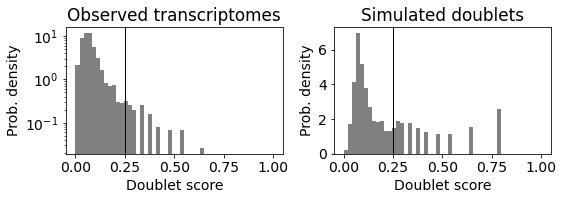

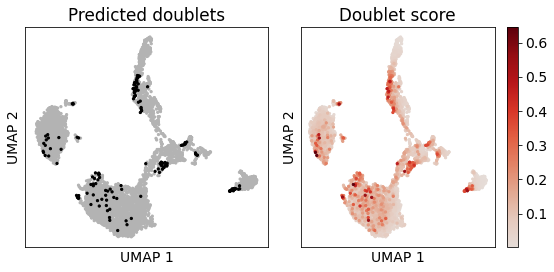


R221 2022-09-01 12:06:12.953953
Counts matrix shape: 7127 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.1%
Elapsed time: 8.1 seconds
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 37.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.9%
237/7127 of BCs called as doublets


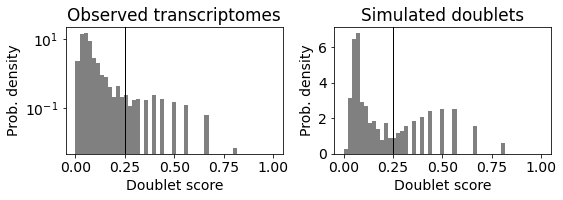

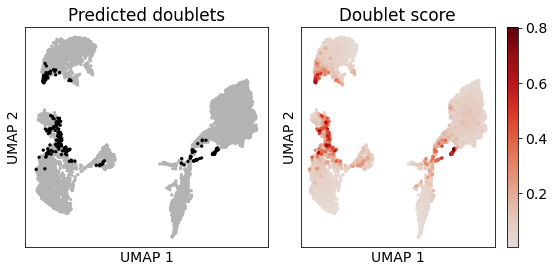


R223 2022-09-01 12:06:47.694357
Counts matrix shape: 9469 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 53.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.3%
Elapsed time: 19.2 seconds
Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 48.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.9%
451/9469 of BCs called as doublets


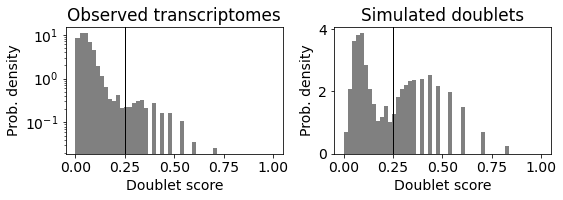

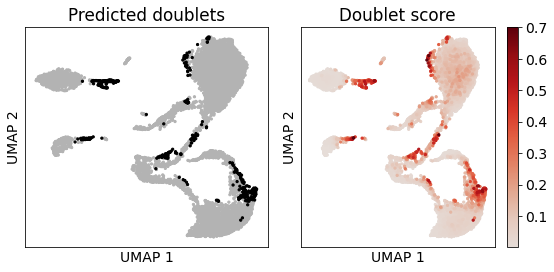


R238 2022-09-01 12:08:00.357678
Counts matrix shape: 7817 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
Elapsed time: 9.1 seconds
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 38.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.7%
317/7817 of BCs called as doublets


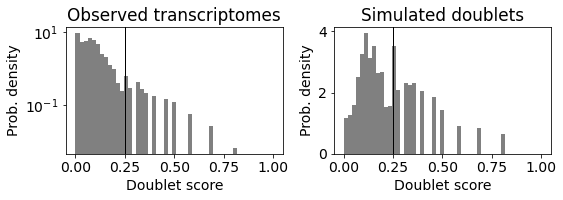

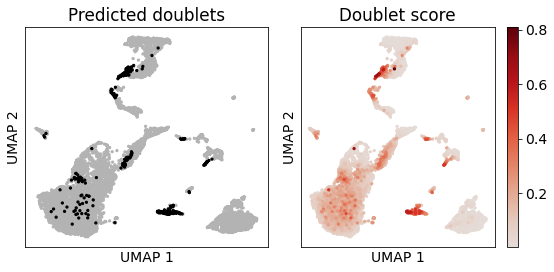


R275 2022-09-01 12:08:53.343676
Counts matrix shape: 6166 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.7%
Elapsed time: 5.7 seconds
Detected doublet rate = 2.3%
Estimated detectable doublet fraction = 29.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.8%
142/6166 of BCs called as doublets


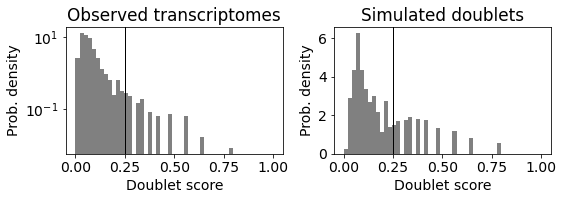

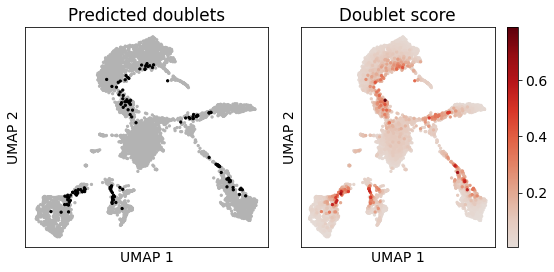


R277 2022-09-01 12:09:25.847839
Counts matrix shape: 8029 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.0%
Elapsed time: 9.0 seconds
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 14.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.9%
142/8029 of BCs called as doublets


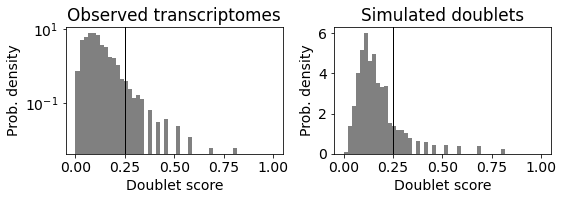

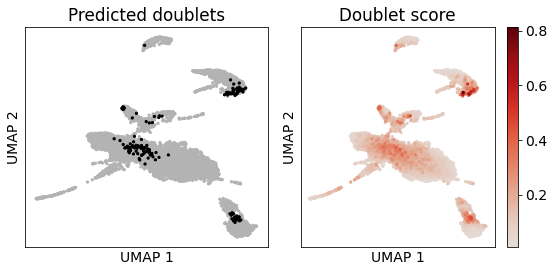


R317 2022-09-01 12:10:18.374414
Counts matrix shape: 12520 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.0%
Elapsed time: 21.2 seconds
Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 36.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.4%
385/12520 of BCs called as doublets


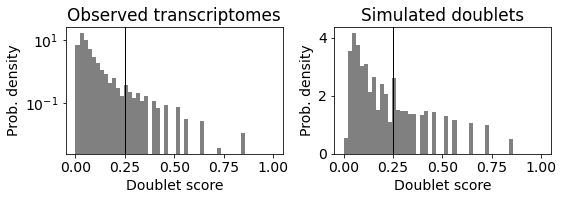

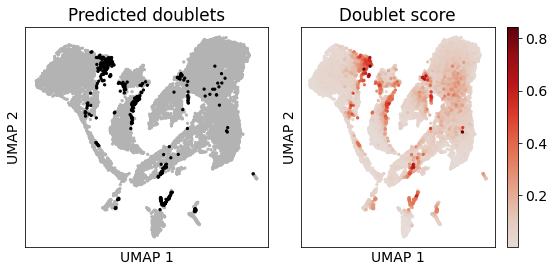


R319 2022-09-01 12:11:39.644572
Counts matrix shape: 11438 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.5%
Elapsed time: 14.8 seconds
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 40.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.5%
481/11438 of BCs called as doublets


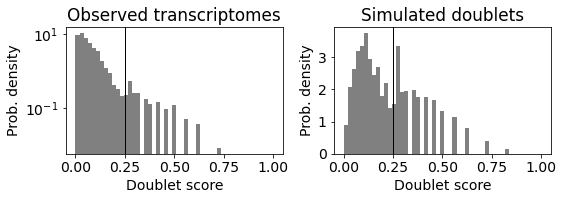

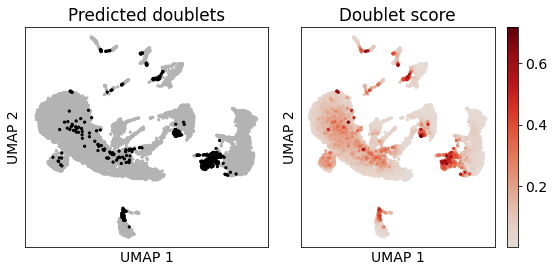


R343 2022-09-01 12:12:48.527265
Counts matrix shape: 5808 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 5.2 seconds
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 12.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.6%
32/5808 of BCs called as doublets


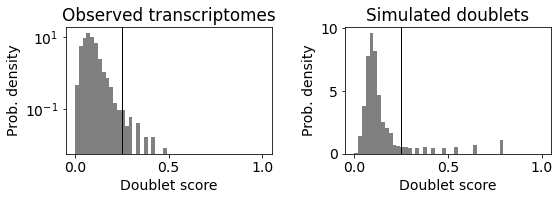

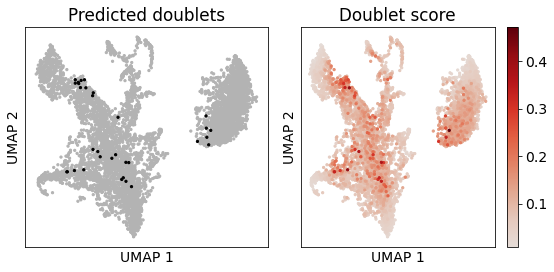


R349 2022-09-01 12:13:19.906701
Counts matrix shape: 6113 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.0%
Elapsed time: 5.9 seconds
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 8.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 19.6%
106/6113 of BCs called as doublets


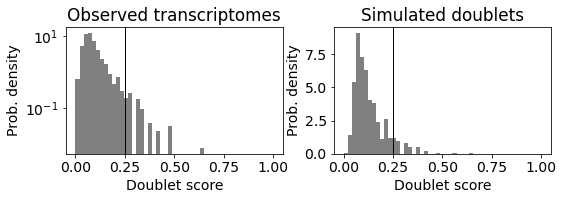

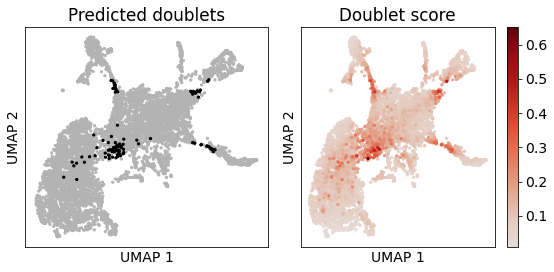


R364 2022-09-01 12:13:49.100240
Counts matrix shape: 5353 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.9%
Elapsed time: 5.1 seconds
Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 21.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.9%
168/5353 of BCs called as doublets


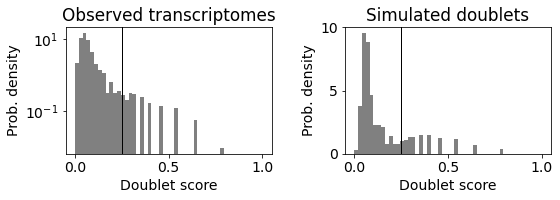

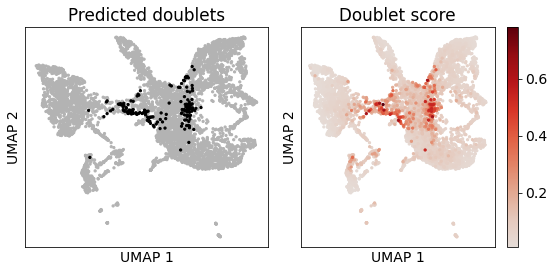

In [13]:
for sample in samples2:
    print(sample, datetime.now())
    
    #read in inputs
    input_dir = '/nfs/lab/projects/multiomic_islet/outputs/multiome/indv_sample_processing/' + sample + '/matrix_market'
    counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
    genes = np.array(scr.load_genes(input_dir + '/genes.tsv', delimiter='\t', column=0))
    
    print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
    print('Number of genes in gene list: {}'.format(len(genes)))
    
    #run the default pipeline
    scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                              min_cells=3, 
                                                              min_gene_variability_pctl=85, 
                                                              n_prin_comps=30)
    
    #call doublets based on set threshold
    predicted_doublets = scrub.call_doublets(threshold=custom_doublet_threshold) 
    print(str(sum(predicted_doublets)) + '/' + str(len(predicted_doublets)) + ' of BCs called as doublets')
    
    #estimate the doublet score threshold - plot doublet score histograms
    scrub.plot_histogram()
    plt.show()

    #visualize in 2D
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    scrub.plot_embedding('UMAP', order_points=True)
    plt.show()
    
    #write out results to a new file
    barcodes_fp = input_dir + '/barcodes.tsv'
    with open(barcodes_fp, 'r') as f:
        with open(input_dir + '/scrublet_predicted_doublets_cutoff{}.txt'.format(custom_doublet_threshold), 'w') as o:
            counter=0
            for line in f:
                o.write('\t'.join((line.strip(), str(predicted_doublets[counter]), str(doublet_scores[counter]), '\n')))
                counter+=1
    
    #delete object and continue loop
    del scrub
    print()